In [1]:
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import glob
#read all file
all_file_path=glob.glob('/kaggle/input/datverse/*.edf')
print(len(all_file_path))

28


In [3]:
healthy_file_path = [i for i in all_file_path if 'h' in i.split('/')[4]]
patient_file_path = [i for i in all_file_path if 's' in i.split('/')[4]]
print(len(healthy_file_path)),print(len(patient_file_path))

14
14


(None, None)

Extracting EDF parameters from /kaggle/input/datverse/s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-03-11 12:08:50 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
 subject_info: <subject_info | his_id: S2JS>
>
['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']
[[2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 ...
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]]
[0.00000e+00 4.00000e-03 8.00

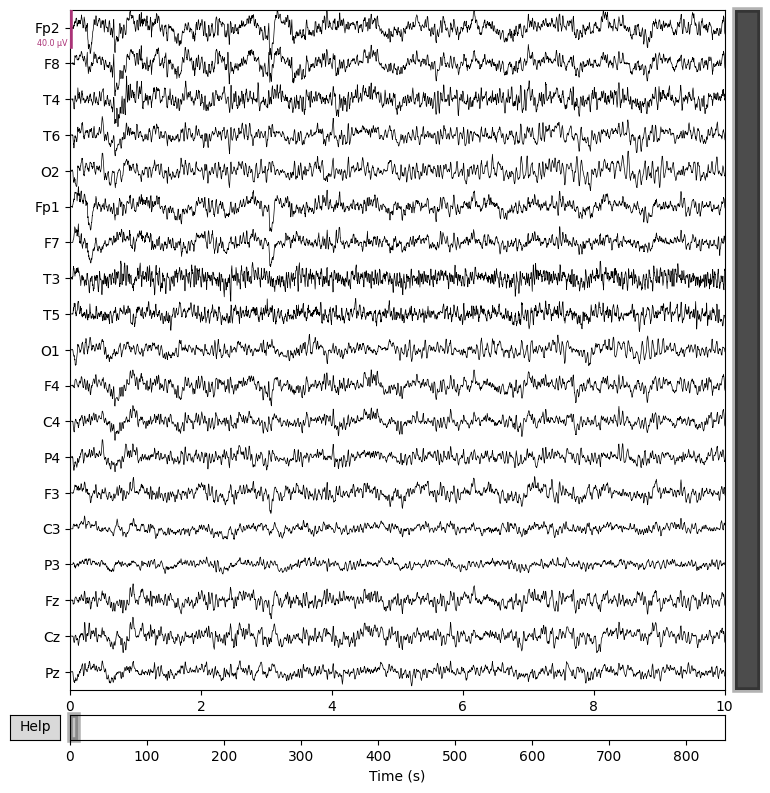

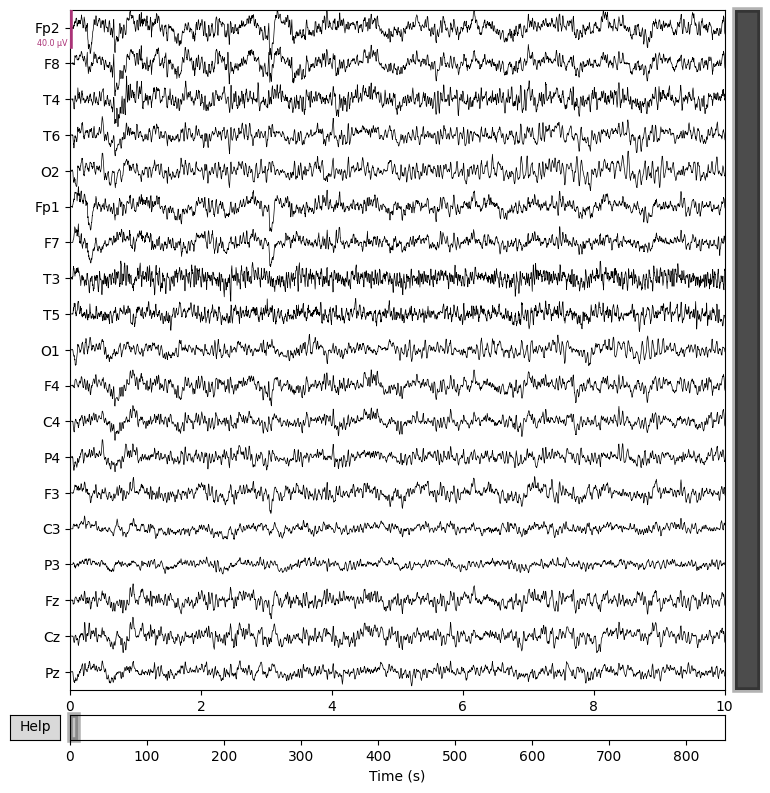

In [4]:
import mne

# Load the EDF file
file_path = "/kaggle/input/datverse/s10.edf"
raw = mne.io.read_raw_edf(file_path, preload=True)

# Basic information
print(raw.info)  # Display metadata
print(raw.ch_names)  # List channel names

# Access data
data, times = raw[:]
print(data)  # The signal data
print(times)  # Time information

# Plot the data (optional)
raw.plot()

In [5]:
def read_data(file_path):
    datax=mne.io.read_raw_edf(file_path,preload=True)
    datax.set_eeg_reference()
    datax.filter(l_freq=1,h_freq=45)
    epochs=mne.make_fixed_length_epochs(datax,duration=25,overlap=0)
    epochs=epochs.get_data()
    return epochs #trials,channel,length

In [6]:
data=read_data(healthy_file_path[0])

Extracting EDF parameters from /kaggle/input/datverse/h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [7]:
%%capture
control_epochs_array=[read_data(subject) for subject in healthy_file_path]
patients_epochs_array=[read_data(subject) for subject in patient_file_path]

In [8]:
control_epochs_labels=[len(i)*[0] for i in control_epochs_array]
patients_epochs_labels=[len(i)*[1] for i in patients_epochs_array]
print(len(control_epochs_labels),len(patients_epochs_labels))

14 14


In [9]:
epochs_array=control_epochs_array+patients_epochs_array
epochs_labels=control_epochs_labels+patients_epochs_labels
print(len(epochs_array),len(epochs_labels))


28 28


In [10]:
groups=[[i]*len(j) for i, j in enumerate(epochs_array)]
len(groups)

28

In [11]:
epochs_array = np.vstack(epochs_array)  # Assuming epochs_array contains arrays that can be stacked vertically
epochs_labels = np.hstack(epochs_labels)  # Convert to NumPy array
groups_array = np.hstack(groups)  # Convert to NumPy array

# Now you can safely check the shapes
#no. of segments,no. of channels,length of signal
print(epochs_array.shape, epochs_labels.shape, groups_array.shape)

(1142, 19, 6250) (1142,) (1142,)


In [12]:
print(epochs_array.shape,epochs_labels.shape,groups_array.shape)

(1142, 19, 6250) (1142,) (1142,)


In [13]:
from scipy import stats

import numpy as np
from tqdm import tqdm  # Use tqdm instead of tqdm_notebook

# Define feature functions
def mean(data):
    return np.mean(data, axis=-1)

def std(data):
    return np.std(data, axis=-1)

def ptp(data):
    return np.ptp(data, axis=-1)

def var(data):
    return np.var(data, axis=-1)

def minim(data):
    return np.min(data, axis=-1)

def maxim(data):
    return np.max(data, axis=-1)

def argminim(data):
    return np.argmin(data, axis=-1).astype(float)  # Convert to float for consistent shape
def argmaxim(data):
    return np.argmax(data, axis=-1).astype(float)  # Convert to float for consistent shape

def mean_square(data):
    return np.mean(data**2, axis=-1)

def rms(data):
    return np.sqrt(np.mean(data**2, axis=-1))

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data, axis=-1)), axis=-1)

def skewness(data):
    return stats.skew(data, axis=-1)

def kurtosis(data):
    return stats.kurtosis(data, axis=-1)

# Concatenate features while ensuring each feature is calculated for each channel
def concatenate_features(data):
    # Stack each feature along the last axis for each channel
    return np.stack((
        mean(data),
        std(data),
        ptp(data),
        var(data),
        minim(data),
        maxim(data),
        argminim(data),
        argmaxim(data),
        mean_square(data),
        rms(data),
        abs_diffs_signal(data),
        skewness(data),
        kurtosis(data)
    ), axis=-1)  # Stack along the last axis to get 13 features per channel

# Process each epoch to create features array with shape (1142, 19, 13)
features = []
for data in tqdm(epochs_array):  # Replace tqdm_notebook with tqdm
    features.append(concatenate_features(data))

features = np.array(features)  # Expected shape: (1142, 19, 13)
print(features.shape)  # Should output (1142, 19, 13)


100%|██████████| 1142/1142 [00:08<00:00, 128.69it/s]

(1142, 19, 13)


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
import eli5
from eli5.sklearn import PermutationImportance
import numpy as np

# Define feature names for clarity
stat_feature_names = ["Mean", "Std", "PTP", "Var", "Min", "Max", "ArgMin", "ArgMax",
                      "MeanSquare", "RMS", "AbsDiff", "Skewness", "Kurtosis"]

# Reshape the features to (samples, 13 * channels)
num_samples, num_channels, num_features = features.shape
X = features.reshape(num_samples, num_channels * num_features)  # Shape (samples, 13 * channels)
y = epochs_labels  # Labels from previous step

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Adaptive Gradient Boosting model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Evaluate the model
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))




Train Accuracy: 1.0
Test Accuracy: 0.9650655021834061


In [15]:
import eli5
from eli5.sklearn import PermutationImportance
import numpy as np

# Aggregate statistical features across all channels (e.g., take the mean across channels)
X_statistical = features.mean(axis=1)  # Shape: (samples, 13), reducing channels

# Train-test split for statistical features only
X_train_stat, X_test_stat, y_train_stat, y_test_stat = train_test_split(
    X_statistical, y, test_size=0.2, random_state=42
)

# Train the model on statistical features only
model_stat = HistGradientBoostingClassifier()
model_stat.fit(X_train_stat, y_train_stat)

# Apply Permutation Importance
perm = PermutationImportance(model_stat, random_state=42)
perm.fit(X_test_stat, y_test_stat)

# Display feature importance for statistical features only
eli5.show_weights(perm, feature_names=stat_feature_names)


Weight,Feature
0.1231 ± 0.0256,AbsDiff
0.0865 ± 0.0355,Std
0.0769 ± 0.0570,Var
0.0157 ± 0.0361,Skewness
0.0157 ± 0.0118,Kurtosis
0.0105 ± 0.0279,Max
0.0096 ± 0.0160,Mean
0.0061 ± 0.0251,PTP
0.0052 ± 0.0102,ArgMax
0.0026 ± 0.0225,Min


In [16]:
import lime
import lime.lime_tabular
import numpy as np

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_stat,  # Train data without labels
    feature_names=stat_feature_names,  # Only statistical feature names
    class_names=["Healthy", "Patient"],  # Adjust based on your labels
    mode="classification"
)

# Choose a sample to explain (e.g., first test sample)
sample_idx = 0  # Change this index to analyze different samples
sample_instance = X_test_stat[sample_idx].reshape(1, -1)  # Reshape for prediction

# Generate explanation for the sample
exp = explainer.explain_instance(
    data_row=X_test_stat[sample_idx], 
    predict_fn=model_stat.predict_proba
)

# Display explanation
exp.show_in_notebook()


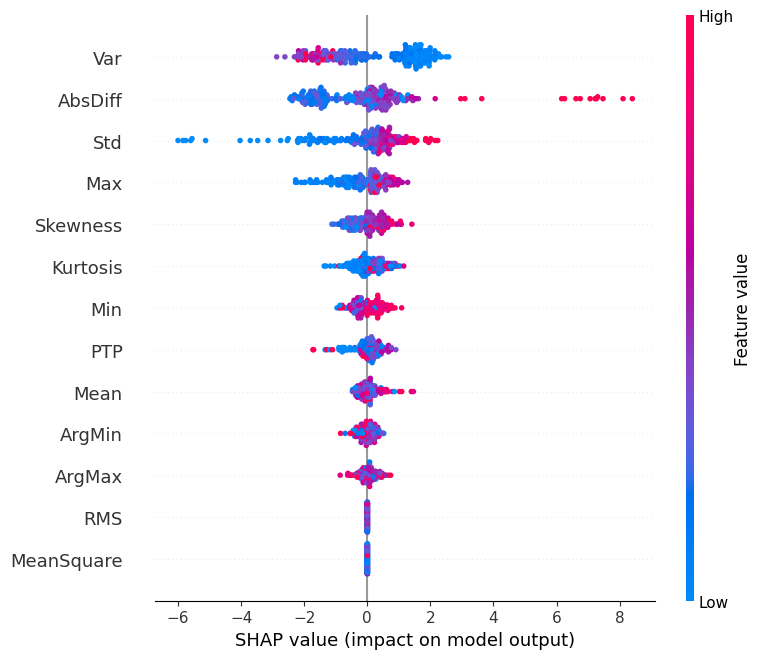

In [17]:
import shap

# Initialize SHAP Explainer (automatically detects correct method)
explainer = shap.Explainer(model_stat, X_train_stat)

# Compute SHAP values for test set with additivity check disabled
shap_values = explainer(X_test_stat, check_additivity=False)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test_stat, feature_names=stat_feature_names)


In [18]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


In [19]:
# Flatten each sample from (19, 13) → (247,)
X = features.reshape(features.shape[0], -1)
print(X.shape)  # Should print (1142, 247)


(1142, 247)


Train Accuracy: 1.0
Test Accuracy: 0.9650655021834061


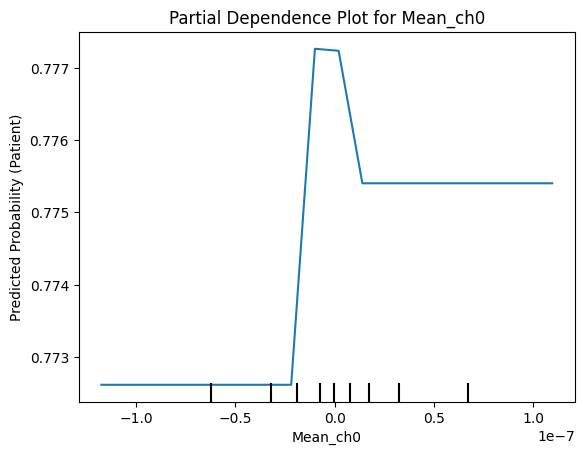

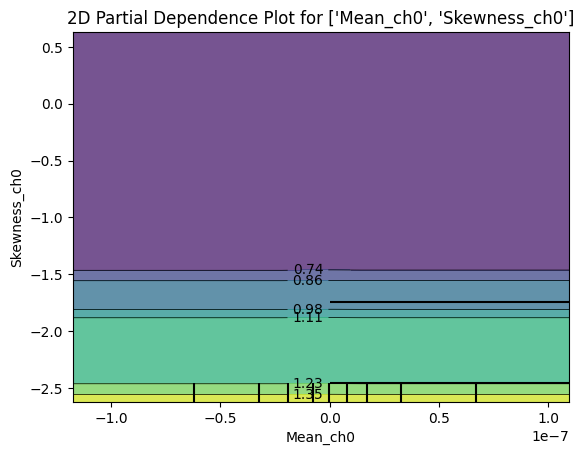

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

# Assuming features, epochs_labels, and stat_feature_names are defined
stat_feature_names = ["Mean", "Std", "PTP", "Var", "Min", "Max", "ArgMin", "ArgMax",
                      "MeanSquare", "RMS", "AbsDiff", "Skewness", "Kurtosis"]
feature_names = [f"{stat}_ch{channel}" for channel in range(19) for stat in stat_feature_names]

# Reshape features
num_samples, num_channels, num_features = features.shape
X = features.reshape(num_samples, num_channels * num_features)  # Shape: (samples, 19 * 13)
y = epochs_labels  # Binary labels (0 for healthy, 1 for patient)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

# Convert X_train to DataFrame for sklearn PDP
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# 1D PDP for Mean_ch0
feature_to_plot = "Mean_ch0"
feature_idx = feature_names.index(feature_to_plot)
PartialDependenceDisplay.from_estimator(
    model,
    X_train_df,
    features=[feature_to_plot],  # Use feature name directly
    feature_names=feature_names,
    grid_resolution=20,
    kind="average"
)
plt.title(f"Partial Dependence Plot for {feature_to_plot}")
plt.ylabel("Predicted Probability (Patient)")
plt.show()

# 2D PDP for Mean_ch0 and Skewness_ch0
features_to_plot = ["Mean_ch0", "Skewness_ch0"]
feature_indices = [feature_names.index(f) for f in features_to_plot]
PartialDependenceDisplay.from_estimator(
    model,
    X_train_df,
    features=[(features_to_plot[0], features_to_plot[1])],  # Pair of feature names
    feature_names=feature_names,
    grid_resolution=20,
    kind="average"
)
plt.title(f"2D Partial Dependence Plot for {features_to_plot}")
plt.show()

Train Accuracy: 0.9737130339539978
Test Accuracy: 0.74235807860262
Skipping feature 'Mean' due to error: percentiles are too close to each other, unable to build the grid. Please choose percentiles that are further apart.
Skipping feature 'Var' due to error: percentiles are too close to each other, unable to build the grid. Please choose percentiles that are further apart.
Skipping feature 'MeanSquare' due to error: percentiles are too close to each other, unable to build the grid. Please choose percentiles that are further apart.


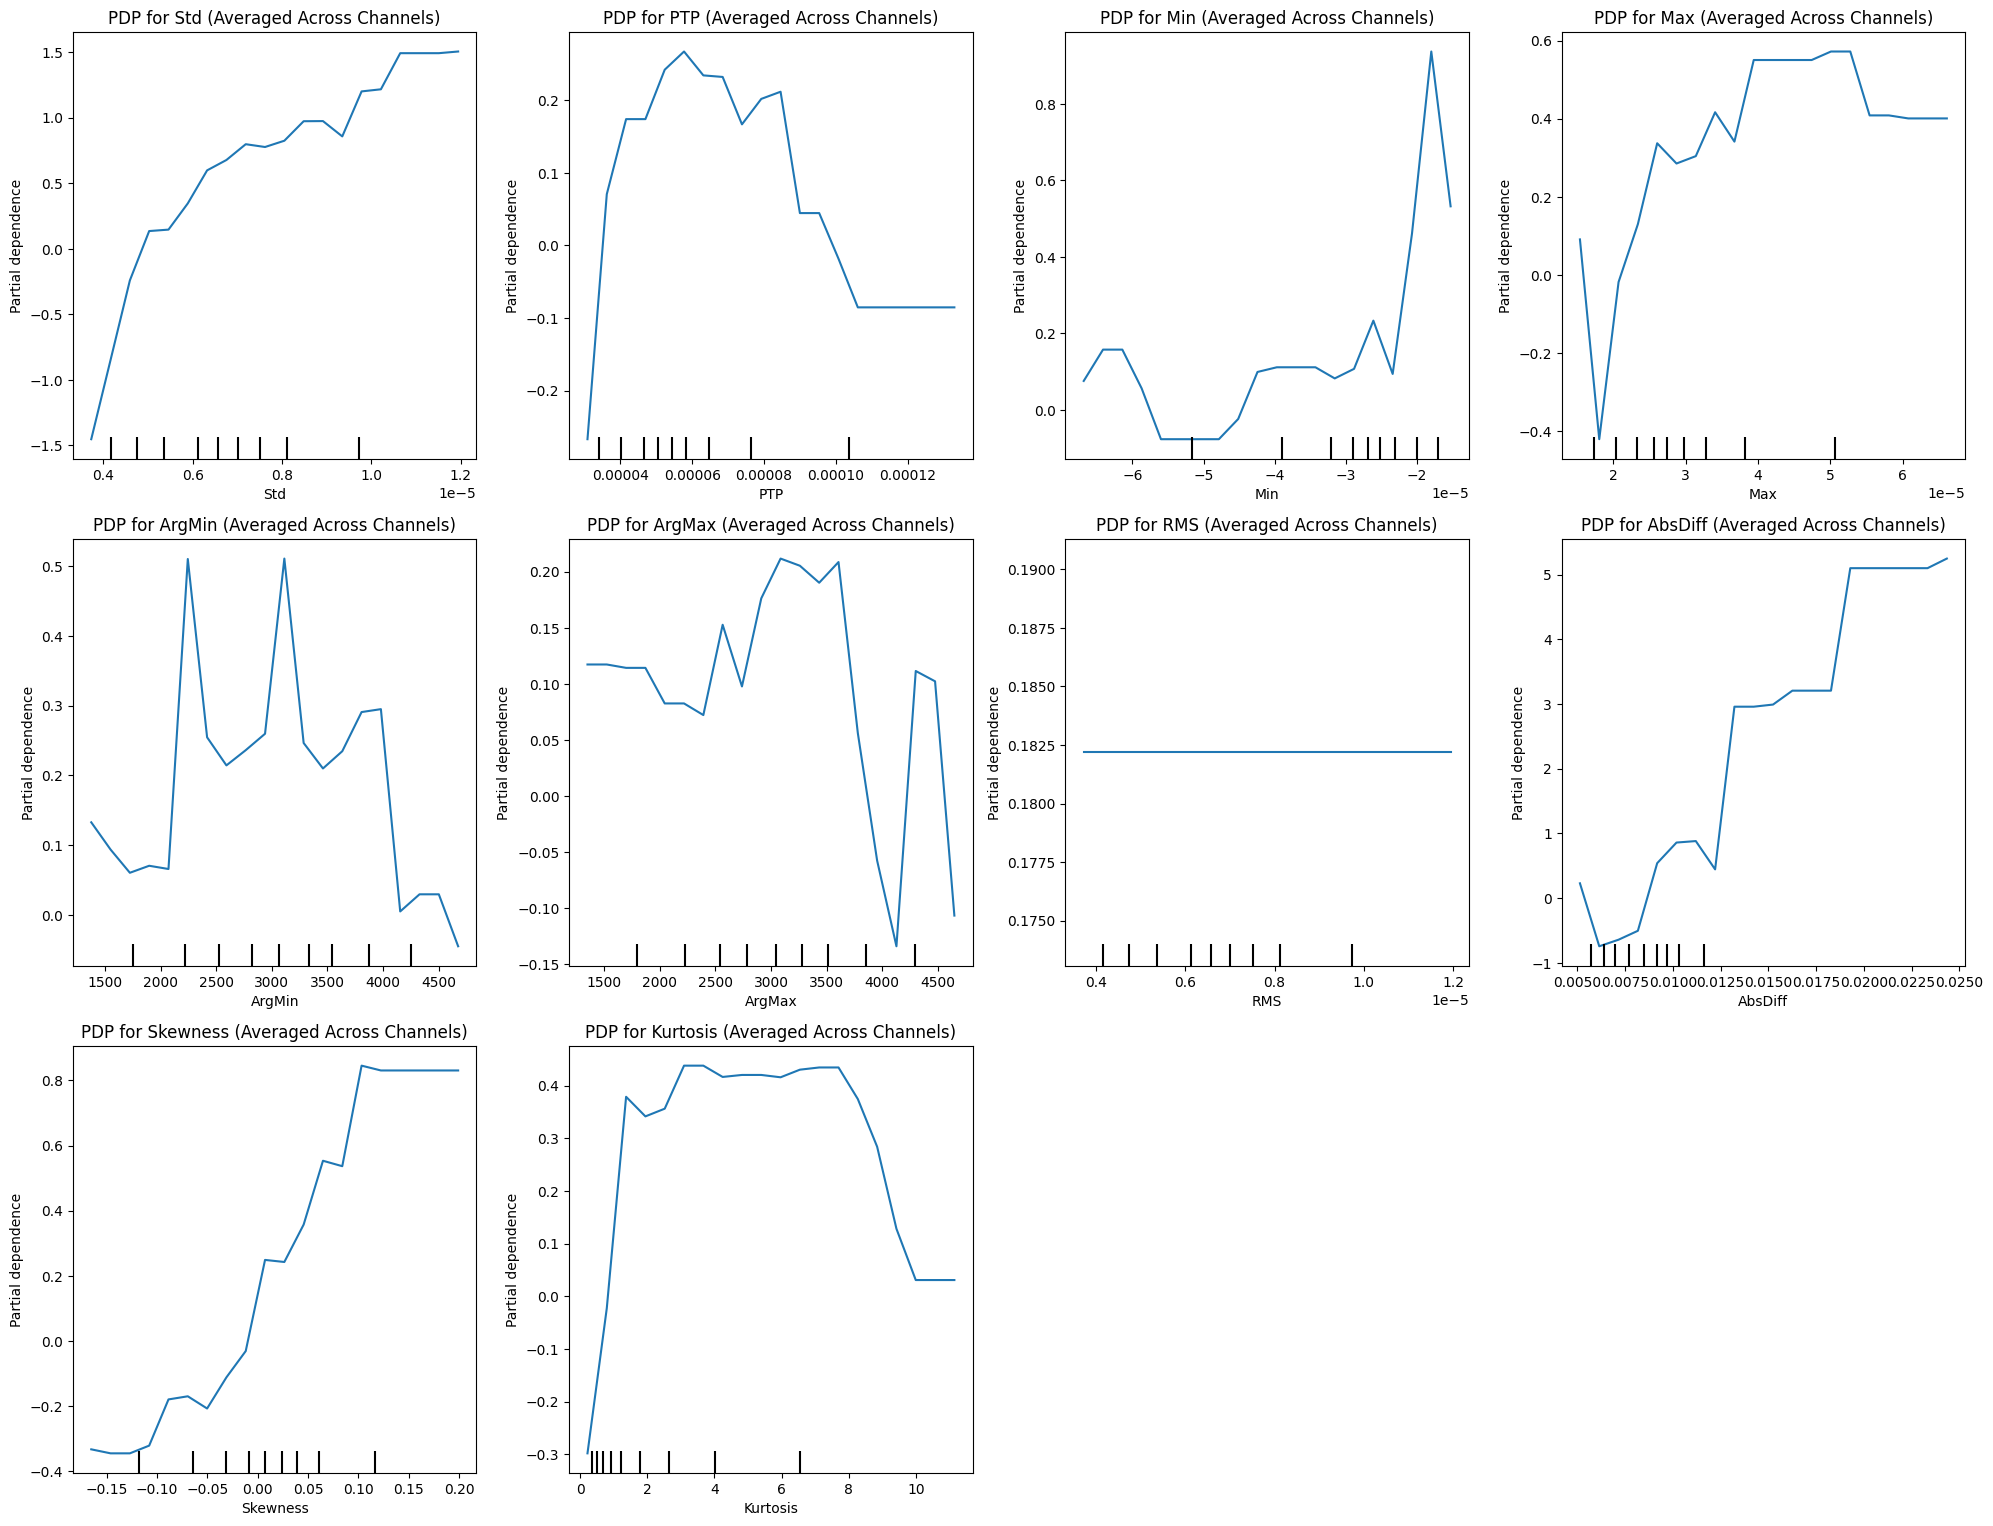

Skipping individual PDP for 'Mean' due to error: percentiles are too close to each other, unable to build the grid. Please choose percentiles that are further apart.
Skipping individual PDP for 'Var' due to error: percentiles are too close to each other, unable to build the grid. Please choose percentiles that are further apart.
Skipping individual PDP for 'MeanSquare' due to error: percentiles are too close to each other, unable to build the grid. Please choose percentiles that are further apart.


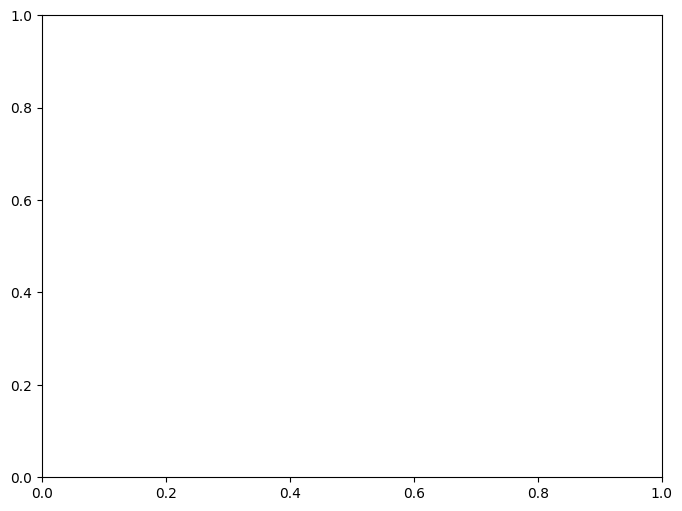

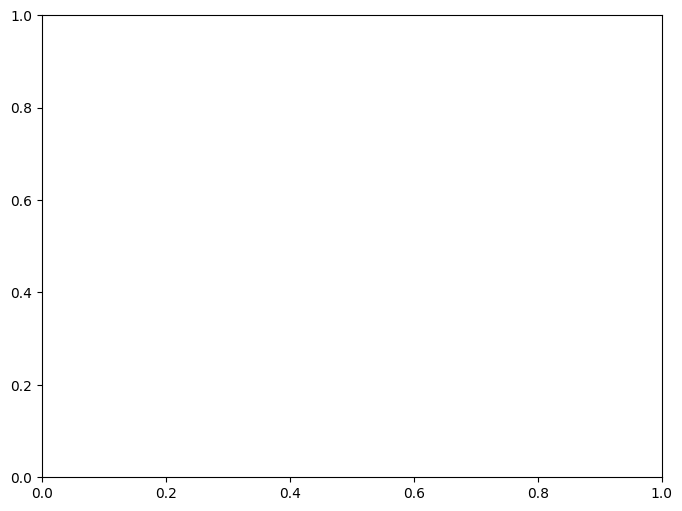

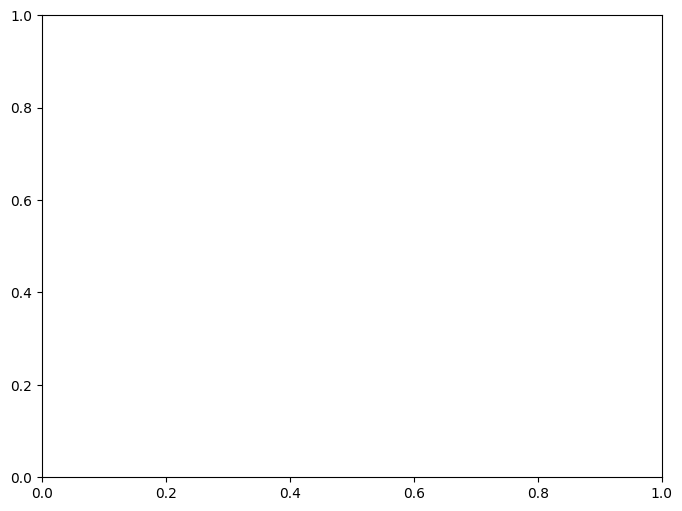

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

# Assuming features and epochs_labels are defined
# features.shape = (num_samples, 19, 13) -> (samples, channels, stats)
stat_feature_names = ["Mean", "Std", "PTP", "Var", "Min", "Max", "ArgMin", "ArgMax",
                      "MeanSquare", "RMS", "AbsDiff", "Skewness", "Kurtosis"]

# Average each statistical feature across all 19 channels
X = np.mean(features, axis=1)  # Shape: (num_samples, 13)
y = epochs_labels  # Binary labels (0 for healthy, 1 for patient)

# Feature names (no channel suffix, as we're averaging)
feature_names = stat_feature_names

# Check feature variability to identify potential issues
stds = np.std(X, axis=0)
for feature, std in zip(feature_names, stds):
    if std < 1e-6:
        print(f"Warning: Feature '{feature}' has very low variance (std = {std:.6f}). PDP may fail.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with regularization to reduce overfitting
model = HistGradientBoostingClassifier(
    max_depth=5,  # Limit tree depth
    min_samples_leaf=10,  # Require more samples per leaf
    l2_regularization=0.1,  # Add L2 penalty
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate model
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

# Convert X_train to DataFrame for sklearn PDP
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Generate 1D PDPs for all 13 averaged features
features_to_plot = feature_names  # All 13 statistical features

# Create a figure with subplots (4 rows, 4 columns to fit up to 13 plots)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()  # Flatten for easier indexing
plot_idx = 0  # Track used subplots

for feature in features_to_plot:
    try:
        PartialDependenceDisplay.from_estimator(
            model,
            X_train_df,
            features=[feature],
            feature_names=feature_names,
            grid_resolution=20,
            kind="average",
            percentiles=(0.05, 0.95),  # Default, but explicit for clarity
            ax=axes[plot_idx]
        )
        axes[plot_idx].set_title(f"PDP for {feature} (Averaged Across Channels)")
        axes[plot_idx].set_ylabel("Predicted Probability (Patient)")
        plot_idx += 1
    except ValueError as e:
        print(f"Skipping feature '{feature}' due to error: {e}")

# Remove unused subplots
for idx in range(plot_idx, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and save
plt.tight_layout()
plt.savefig("pdp_13_features_averaged_channels.png")
plt.show()

# Optional: Save individual PDPs for successful features
for feature in features_to_plot:
    try:
        fig, ax = plt.subplots(figsize=(8, 6))
        PartialDependenceDisplay.from_estimator(
            model,
            X_train_df,
            features=[feature],
            feature_names=feature_names,
            grid_resolution=20,
            kind="average",
            percentiles=(0.05, 0.95),
            ax=ax
        )
        ax.set_title(f"Partial Dependence Plot for {feature} (Averaged Across Channels)")
        ax.set_ylabel("Predicted Probability (Patient)")
        plt.savefig(f"pdp_{feature}_averaged.png")
        plt.close()
    except ValueError as e:
        print(f"Skipping individual PDP for '{feature}' due to error: {e}")

In [ ]:
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt
import numpy as np

# Select top features (already selected)
top_features_idx = sorted_idx  # Top 10 feature indices
top_features_names = [full_feature_names[i] for i in top_features_idx]

for idx, feature_idx in enumerate(top_features_idx):
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Compute PDP + ICE
    pd_results = partial_dependence(
        model,
        X_test,
        features=[feature_idx],
        kind='both',  # "both" for PDP + ICE
        grid_resolution=50
    )
    
    averaged_predictions = pd_results['average'][0]  # ✅ Correct
    individual_predictions = pd_results['individual'][0]  # ✅ Correct
    values = pd_results['values'][0]  # ✅ Correct
    
    # Plot ICE curves (individual)
    for curve in individual_predictions:
        ax.plot(values, curve, color="lightgray", alpha=0.4)
    
    # Plot PDP (average)
    ax.plot(values, averaged_predictions, color="red", linewidth=2, label="PDP (Average)")
    
    ax.set_xlabel(top_features_names[idx])
    ax.set_ylabel('Partial Dependence')
    ax.set_title(f"PDP + ICE: {top_features_names[idx]}")
    ax.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [28]:
# Find the feature with highest average importance
top_feature = list(sorted_avg_importances.keys())[0]
print(f"Top statistical feature: {top_feature}")


Top statistical feature: AbsDiff


In [29]:
# Which columns correspond to this top feature
top_feature_indices = [idx for idx, stat in enumerate(feature_type_per_column) if stat == top_feature]
print(f"Number of features (channels) corresponding to {top_feature}: {len(top_feature_indices)}")


Number of features (channels) corresponding to AbsDiff: 19


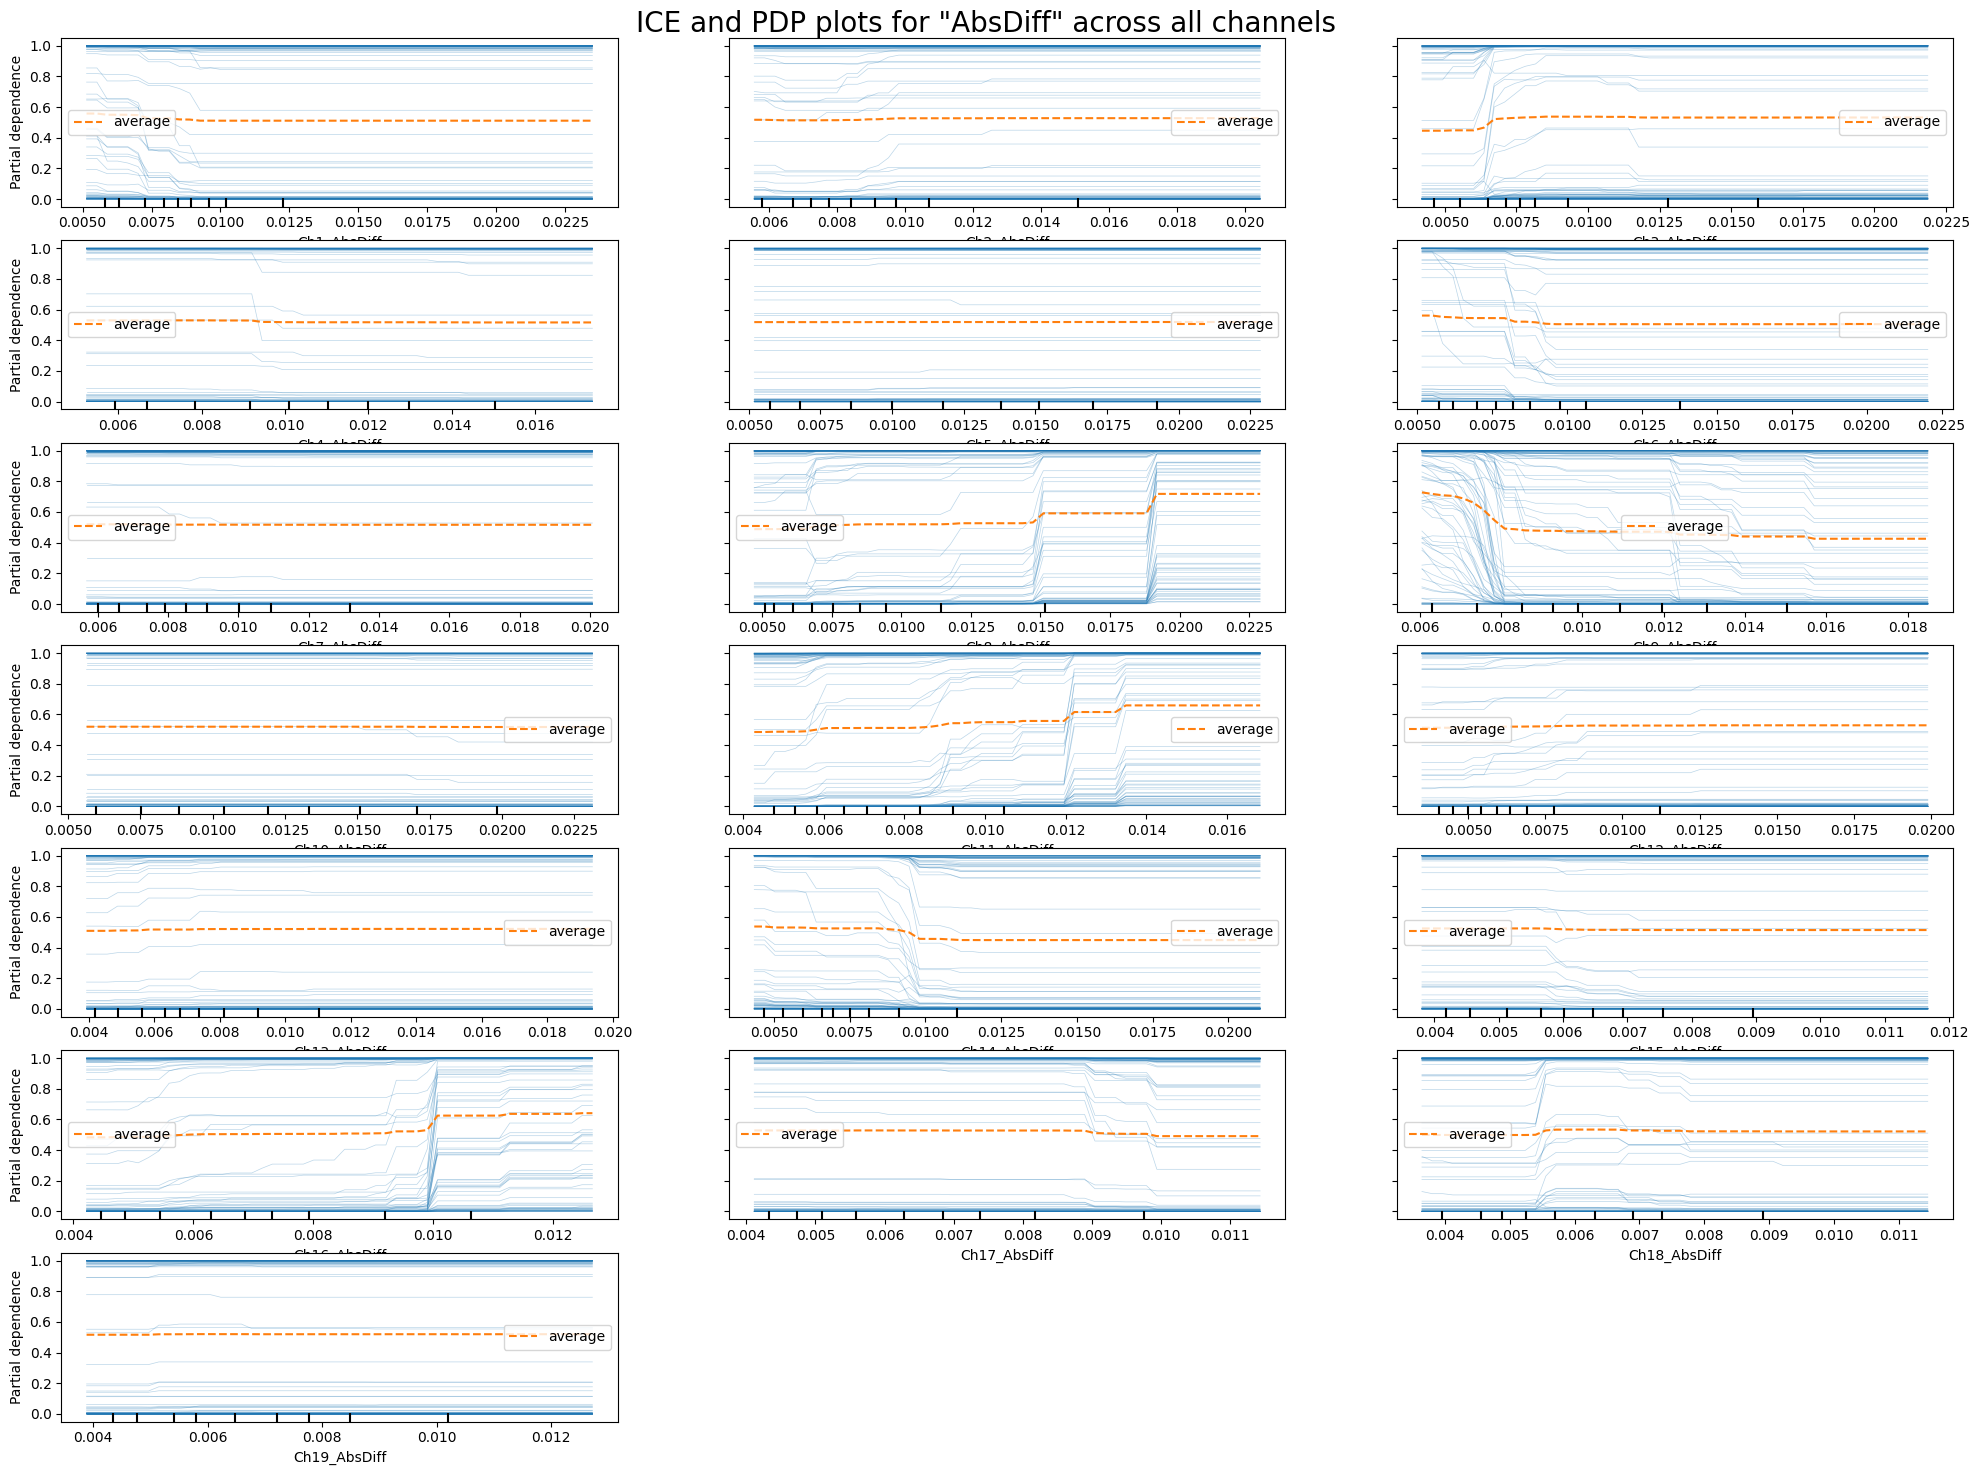

In [30]:
from sklearn.inspection import PartialDependenceDisplay

# Plot ICE curves and PDP for all channels (for top statistical feature)
fig, ax = plt.subplots(figsize=(20, 15))

PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=top_feature_indices,
    feature_names=full_feature_names,  # if you have full_feature_names
    kind="both",  # both PDP and ICE
    subsample=100,  # speed up
    n_jobs=-1,
    grid_resolution=50,
    ax=ax
)

plt.suptitle(f'ICE and PDP plots for "{top_feature}" across all channels', fontsize=20)
plt.tight_layout()
plt.show()
